<a href="https://colab.research.google.com/github/navavatpi/researchPhd/blob/develop/corianderScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # https://pypi.python.org/pypi/pydot
# !apt-get -qq install -y graphviz && pip install pydot
# import pydot

# Template

## Environment Setup

In [12]:
# Enabling and testing the TPU
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.6.0
Running on TPU  ['10.22.182.90:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.22.182.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.22.182.90:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [34]:
# libraries import
import os
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV # I/O separator
from sklearn.preprocessing import StandardScaler # data preparation
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

%matplotlib inline # enable visualization visible
random_seed = 20 # random seed

UsageError: unrecognized arguments: # enable visualization visible


In [14]:
# connect to google drive to obtain dataset
# !note: need to perform authorization by following below link
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Acquisition

In [15]:
# list all data sample in specific directory
!ls /content/drive/My\ Drive/all_about_phd/phd_data/sample_data

corriander_sample01_0001_emptyname		    corriander_sample_2_0009
corriander_sample01_defect_emptyname_0001	    corriander_sample_2_0010
corriander_sample01__emptyname_0001		    corriander_sample_3_0001
corriander_sample01_emptyname_0002		    corriander_sample_3_0002
corriander_sample01__emptyname_2021-02-18_06-49-42  corriander_sample_3_0003
corriander_sample01__emptyname_2021-02-18_07-17-28  corriander_sample_3_0005
corriander_sample01__emptyname_2021-02-18_07-30-45  corriander_sample_3_0006
corriander_sample01__emptyname_2021-02-18_08-13-22  corriander_sample_3_0007
corriander_sample_2_0001			    corriander_sample_3_0008
corriander_sample_2_0006			    corriander_sample_3_0009
corriander_sample_2_0007			    corriander_sample_3_0010
corriander_sample_2_0008


In [16]:
# define path to files
defaultdir = '/content/drive/My Drive/all_about_phd/phd_data/'

## full dataset
# rootdir = defaultdir + 'data_20210218'

## test dataset
rootdir = defaultdir + 'sample_data'

## check
print(rootdir)

/content/drive/My Drive/all_about_phd/phd_data/sample_data


In [17]:
# define dataset & metadata as label function
def read_data_from_files(path=rootdir):
  ## assign dataset & metadata
  X_raw = []
  y_slug= []

  ## iterate through directory
  for subdir, dirs, files in os.walk(rootdir):
      for file in files:
        # filter only for raw file
        if file.endswith('.raw'):
            # assign data -> dataset 
            ## by fixing dimension as follows HSI e.g. 
            ### X = length (collection time dependent),
            ### Y = spectral domain (fixed at 224, all spectra),
            ### Z = width (fixed at 640)
            ### then swap axes between width (Z) vs. spectral (Y)
            X_raw.append(np.fromfile(os.path.join(subdir, file), dtype='uint16').reshape(-1,224,640).swapaxes(1,2))
            
            # assign label -> cut some unneceasary
            y_slug.append(re.search('(\d+.+\d+)', file).group(0))

  # extract label; y <- data_slug using RegEx
  y = np.stack([(int(re.findall('([\d{1}])(?=_)', y_slug[index], flags=0)[0])) for index, _ in enumerate(y_slug)])

  # different class number from label 
  y = to_categorical(y - 1, num_classes=len(list(set(y))))

  del y_slug

  # output type = list (x), array (y)
  return X_raw, y

In [18]:
# aquire dataset using defined function
# !note: this process take some minutes
X_raw, y = read_data_from_files()

In [ ]:
# show images of sample in a spectrum
fig, axes = plt.subplots(nrows=2, ncols=2)

## sample 0th - 3th are selected
## Z; spectral, is randomly specified
axes[0, 0].imshow(X_raw[0][:,:,0])
axes[0, 1].imshow(X_raw[1][:,:,50])
axes[1, 0].imshow(X_raw[2][:,:,100])
axes[1, 1].imshow(x_raw[3][:,:,223])

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
fig.suptitle('Example raw data of coriander samples', fontsize=16)
fig.tight_layout()

In [19]:
# disconnect google drive after finish

drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


## Data Prepatation

In [20]:
# define shorten all sample length into the shortest length function
def shorten_data(X_raw=X_raw):
  # find minimum raw data length
  length_min = np.amin([X_raw[index].shape[0] for index, _ in enumerate(X_raw)])

  # find minimum raw data length index
  length_min_index = [index for index, _ in enumerate(X_raw) if X_raw[index].shape[0] == length_min][0]

  # filter raw data length to equal to minimum sample length
  X_shorten = np.stack([X_raw[index][:length_min] for index, _ in enumerate(X_raw)], axis=0)

  # output type = array
  return X_shorten

In [21]:
# perform shortening function
X = shorten_data(X_raw=X_raw)

# checkout dimensionality of shorten data
print('data dimensionality was shorten from', X_raw[0].shape, 'into', X[0].shape)

# delete unused data
del X_raw

data dimensionality was shorten from (337, 640, 224) into (330, 640, 224)


In [22]:
# define scaler function to adjust value using Z-score scaling
def data_zscaler(X=X):

  # setup empty variable w/ the same shape to original tensor
  X_scaled = np.zeros_like(X)

  # scale along spectral domain
  for wavelength in range(X.shape[-1]):
      
      # define scaler method
      scaler = StandardScaler()
      
      # perform normalization -> assign to a temporary variable by
          # flatten all data points shape
          # standardize
          # reshape back to orignial shape
      X_scaled[:,:,:,wavelength] = scaler.fit_transform(X[:,:,:,wavelength].ravel().reshape(-1,1)).reshape(X[:,:,:,1].shape)
  
  return X_scaled

In [25]:
# perform scaler function
# !note: this process take some minutes
Xz = data_zscaler(X=X)

In [26]:
# define scaler function to adjust value using normalization
def data_nscaler(X=X):

  # setup empty variable w/ the same shape to original tensor
  X_scaled = np.zeros_like(X)

  # scale along spectral domain
  for wavelength in range(X.shape[-1]):
      
      # define scaler method
      scaler = MinMaxScaler()
      
      # perform normalization -> assign to a temporary variable by
          # flatten all data points shape
          # normalization
          # reshape back to orignial shape
      X_scaled[:,:,:,wavelength] = scaler.fit_transform(X[:,:,:,wavelength].ravel().reshape(-1,1)).reshape(X[:,:,:,1].shape)
  
  return X_scaled

In [27]:
# perform scaler function
# !note: this process take some minutes
Xn = data_nscaler(X=X)

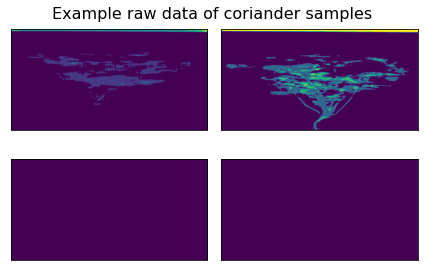

In [36]:
# show images of sample in a spectrum
fig, axes = plt.subplots(nrows=2, ncols=2)

## sample 0th - 3th are selected
## Z; spectral, is randomly specified
axes[0, 0].imshow(Xz[0][:,:,0])
axes[0, 1].imshow(Xz[1][:,:,50])
axes[1, 0].imshow(Xn[2][:,:,100])
axes[1, 1].imshow(Xn[3][:,:,223])

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
fig.suptitle('Example raw data of coriander samples', fontsize=16)
fig.tight_layout()

# We are here @20210927
## there is unusal values transformed from 0 to 65535 using StandardScaler
## there is required to check value transformed using MinMaxScaler which 'how to save data to Drive'

In [ ]:
# Assign by splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

# see splitted data
print('train input: ', len(X_train), '\t train label: ', len(y_train))
print('test input: ', len(X_test), '\t\t test label: ', len(y_test))

train input:  17 	 train label:  17
test input:  6 		 test label:  6


In [ ]:
X_train[:,:,:,:3].shape

(17, 330, 640, 3)

In [ ]:
np.max(X_train)

65535

In [ ]:
np.amax(X)

1

In [ ]:
np.where(65535)

(array([0]),)

In [ ]:
np.where(X == np.amax(X))

(array([2, 2, 2, ..., 3, 3, 3]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   0,   0, ..., 639, 639, 639]),
 array([  4,   5,   6, ..., 214, 215, 216]))

In [ ]:
# define scaler function
def data_minmax(X=X):

  # setup empty variable w/ the same shape to original tensor
  X_scaled = np.zeros_like(X)

  # scale along spectral domain
  for wavelength in range(X.shape[-1]):
      
      # define scaler method
      scaler = MinMaxScaler()
      
      # perform normalization -> assign to a temporary variable by
          # flatten all data points shape
          # standardize
          # reshape back to orignial shape
      X_scaled[:,:,:,wavelength] = scaler.fit_transform(X[:,:,:,wavelength].ravel().reshape(-1,1)).reshape(X[:,:,:,1].shape)
  
  return X_scaled

In [ ]:
X = data_minmax(X=X)

In [ ]:
X_raw[2]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[380, 415, 507, ..., 481, 447, 420],
        [335, 377, 463, ..., 474, 444, 417],
        [333, 374, 459, ..., 425, 397, 376],
        ...,
        [354, 406, 495, ..., 474, 437, 427],
        [354, 406, 495, ..., 516, 479, 464],
        [376, 430, 520, ..., 516, 479, 464]],

       [[380, 415, 507, ..., 481, 447, 420],
        [335, 377, 463, ..., 474, 444, 417],
        [333, 374, 459, ..., 425, 397, 376],
        ...,
        [354, 406, 495, ..., 474, 437, 427],
        [354, 406, 495, ..., 516, 479, 464],
        [376, 430, 520, ..., 516, 479, 464]],

       ...,

       [[241, 236, 246, ..., 253, 251, 242],
        [203, 202, 207, ..., 247, 248, 239],
        [203, 199, 203, ..., 203, 203, 198

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [ ]:
## iterate through directory
for subdir, dirs, files in os.walk(rootdir):
  print(subdir)

In [ ]:
'/content/drive/My\ Drive/all_about_phd/phd_data/sample_data'

'/content/drive/My\\ Drive/all_about_phd/phd_data/sample_data'

In [ ]:
os.walk(root_dir)

<generator object walk at 0x7f06aedc4a50>

In [ ]:
os.walk(rootdir)

<generator object walk at 0x7f06aedc46d0>

In [ ]:
!ls "/content/drive/My\ Drive/all_about_phd/phd_data/sample_data"

ls: cannot access '/content/drive/My\ Drive/all_about_phd/phd_data/sample_data': No such file or directory


In [ ]:
rootdir

'/content/drive/My Drive/all_about_phd/phd_data/sample_data'

In [ ]:
# Listing all subdirectories in a directory
path3 = rootdir
for entry in os.listdir(path3):
    if os.path.isdir(os.path.join(path3, entry)):
        print(entry)

corriander_sample_3_0005
corriander_sample_3_0002
corriander_sample_3_0010
corriander_sample_2_0010
corriander_sample01__emptyname_0001
corriander_sample01__emptyname_2021-02-18_08-13-22
corriander_sample_3_0006
corriander_sample01_defect_emptyname_0001
corriander_sample01__emptyname_2021-02-18_06-49-42
corriander_sample_3_0001
corriander_sample01__emptyname_2021-02-18_07-17-28
corriander_sample01_0001_emptyname
corriander_sample01__emptyname_2021-02-18_07-30-45
corriander_sample_3_0003
corriander_sample_3_0007
corriander_sample01_emptyname_0002
corriander_sample_2_0007
corriander_sample_2_0001
corriander_sample_3_0008
corriander_sample_2_0006
corriander_sample_3_0009
corriander_sample_2_0009
corriander_sample_2_0008


In [ ]:
!ls /content/drive/My\ Drive/all_about_phd/phd_data/sample_data

corriander_sample01_0001_emptyname		    corriander_sample_2_0009
corriander_sample01_defect_emptyname_0001	    corriander_sample_2_0010
corriander_sample01__emptyname_0001		    corriander_sample_3_0001
corriander_sample01_emptyname_0002		    corriander_sample_3_0002
corriander_sample01__emptyname_2021-02-18_06-49-42  corriander_sample_3_0003
corriander_sample01__emptyname_2021-02-18_07-17-28  corriander_sample_3_0005
corriander_sample01__emptyname_2021-02-18_07-30-45  corriander_sample_3_0006
corriander_sample01__emptyname_2021-02-18_08-13-22  corriander_sample_3_0007
corriander_sample_2_0001			    corriander_sample_3_0008
corriander_sample_2_0006			    corriander_sample_3_0009
corriander_sample_2_0007			    corriander_sample_3_0010
corriander_sample_2_0008
